# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?' 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | montepuez
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | furukawa
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | jalai nur
Processing Record 11 of Set 1 | ughelli
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mukah
City not found. Skipping...
Processing Record 19 of Set 1 | cururupu
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,montepuez,-13.1256,38.9997,27.11,46,0,3.33,MZ,1715328557
1,bilibino,68.0546,166.4372,0.11,97,100,1.07,RU,1715328559
2,isafjordur,66.0755,-23.1240,4.02,75,75,2.06,IS,1715328560
3,port-aux-francais,-49.3500,70.2167,7.68,88,100,19.89,TF,1715328560
4,tolanaro,-25.0319,46.9987,26.32,62,0,7.19,MG,1715328561


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montepuez,-13.1256,38.9997,27.11,46,0,3.33,MZ,1715328557
1,bilibino,68.0546,166.4372,0.11,97,100,1.07,RU,1715328559
2,isafjordur,66.0755,-23.1240,4.02,75,75,2.06,IS,1715328560
3,port-aux-francais,-49.3500,70.2167,7.68,88,100,19.89,TF,1715328560
4,tolanaro,-25.0319,46.9987,26.32,62,0,7.19,MG,1715328561


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

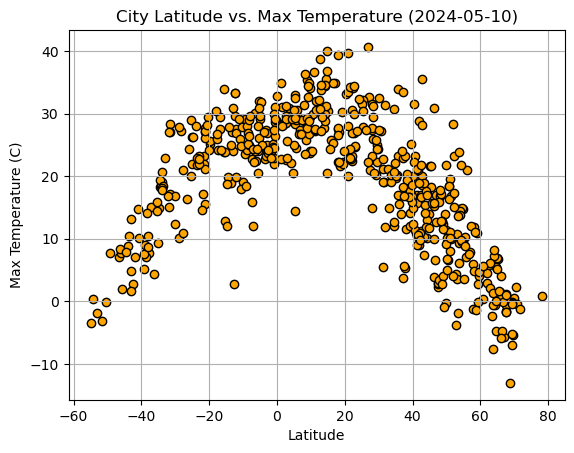

In [3]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
uninx_date = city_data_df.loc[ 1 ,'Date']
date = datetime.datetime.fromtimestamp(uninx_date)
formatted_date = date.strftime('%Y-%m-%d')
plt.scatter(latitude, temperature, c='orange', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title(f'City Latitude vs. Max Temperature ({formatted_date})')

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()


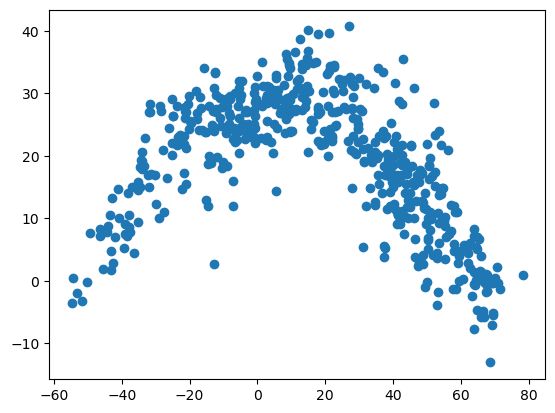

In [4]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

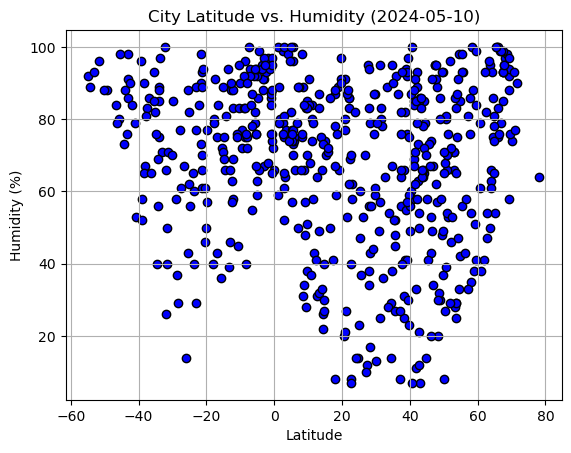

In [5]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, c='blue', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f'City Latitude vs. Humidity ({formatted_date})')

# Save the figure
plt.savefig("../Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

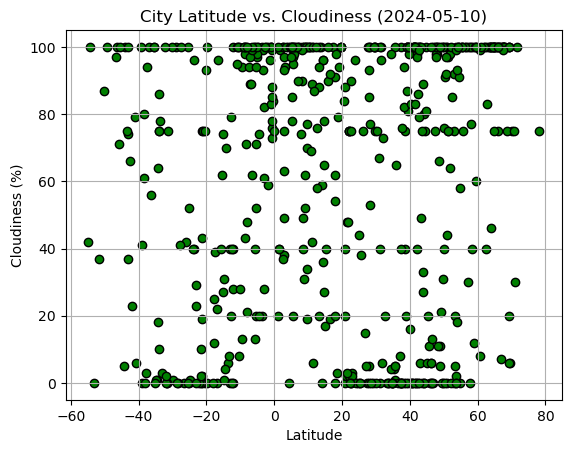

In [6]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudy = city_data_df['Cloudiness']
plt.scatter(latitude, cloudy, c='green', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({formatted_date})')

# Save the figure
plt.savefig("../Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

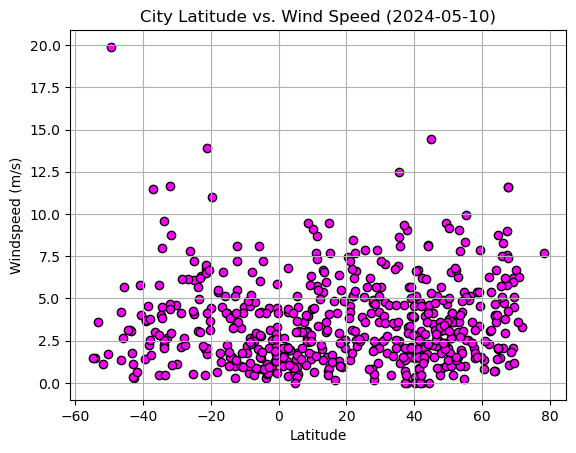

In [7]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(latitude, wind, c='magenta', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({formatted_date})')

# Save the figure
plt.savefig("../Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label='', y_label='', title=''):
    # Plot data points
    plt.scatter(x, y, color='cyan',edgecolors='black' )
    x_annotation = max(x) - 1 * (max(x) - min(x)) 
    y_annotation = min(y) + 0.1 * (max(y) - min(y))  
    
    # Plot the linear regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f'The r-value is: {rvalue}')
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_annotation,y_annotation),fontsize=15,color="red")
    plt.plot(x,regress_values,"r-")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show plot
    plt.show()    

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,0.11,97,100,1.07,RU,1715328559
2,isafjordur,66.0755,-23.1240,4.02,75,75,2.06,IS,1715328560
5,furukawa,38.5717,140.9556,19.75,41,75,1.86,JP,1715328272
9,jalai nur,49.4500,117.7000,14.01,48,100,9.45,CN,1715328566
10,ughelli,5.4899,6.0074,29.52,73,97,1.76,NG,1715328567


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montepuez,-13.1256,38.9997,27.11,46,0,3.33,MZ,1715328557
3,port-aux-francais,-49.3500,70.2167,7.68,88,100,19.89,TF,1715328560
4,tolanaro,-25.0319,46.9987,26.32,62,0,7.19,MG,1715328561
6,edinburgh of the seven seas,-37.0676,-12.3116,15.04,86,100,11.47,SH,1715328564
7,waitangi,-43.9535,-176.5597,8.79,88,100,3.13,NZ,1715328565


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8398285861973535


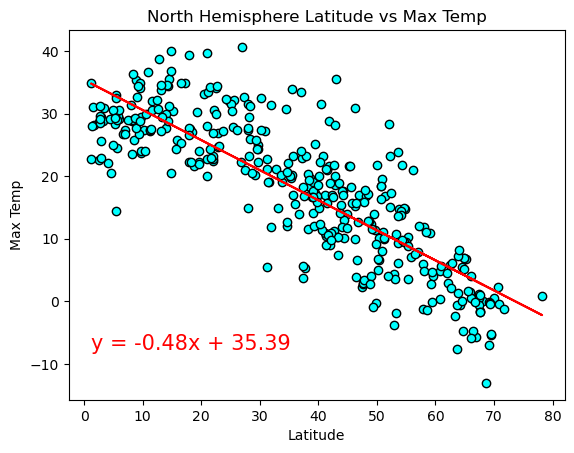

In [31]:
# Linear regression on Northern Hemisphere
Nlatitude = northern_hemi_df['Lat']
Ntemperature = northern_hemi_df['Max Temp']
linear_regression_plot(Nlatitude, Ntemperature, x_label='Latitude', y_label='Max Temp', title='North Hemisphere Latitude vs Max Temp')


The r-value is: 0.7587144034188849


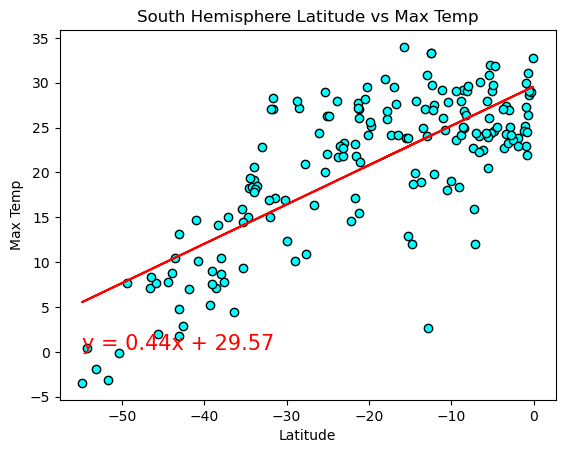

In [32]:
# Linear regression on Southern Hemisphere
Slatitude = southern_hemi_df['Lat']
Stemperature = southern_hemi_df['Max Temp']
linear_regression_plot(Slatitude, Stemperature, x_label='Latitude', y_label='Max Temp', title='South Hemisphere Latitude vs Max Temp')


**Discussion about the linear relationship:**

For both the Northern and Southern Hemispheres, there's a strong correlation between temperature and latitude, indicated by the high negative and positive r-values (-0.83 for the Northern Hemisphere and 0.76 for the Southern Hemisphere). This relationship suggests that as you move closer to the equator (lower latitudes), temperatures tend to increase and further away the lower the temperature gets. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07406502726089867


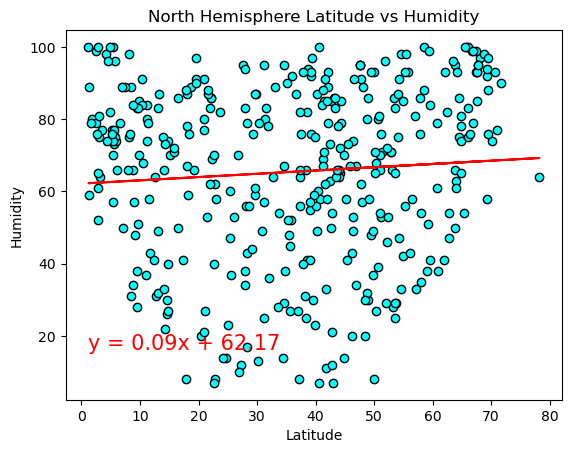

In [33]:
# Northern Hemisphere
Nhumidity = northern_hemi_df['Humidity']
linear_regression_plot(Nlatitude, Nhumidity, x_label='Latitude', y_label='Humidity', title='North Hemisphere Latitude vs Humidity')

The r-value is: 0.06176235749932819


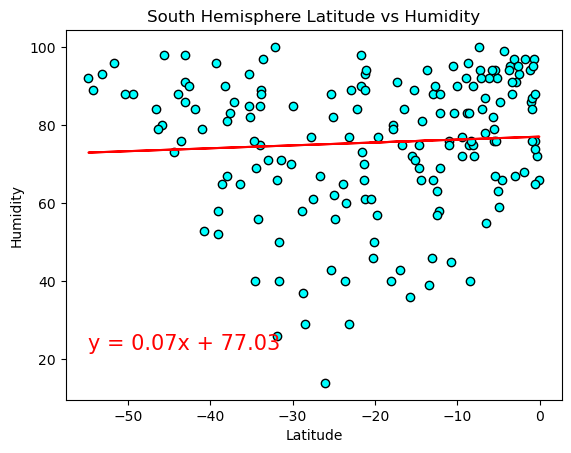

In [34]:
# Southern Hemisphere
Shumidity = southern_hemi_df['Humidity']
linear_regression_plot(Slatitude, Shumidity, x_label='Latitude', y_label='Humidity', title='South Hemisphere Latitude vs Humidity')

**Discussion about the linear relationship:** 

There's a very weak positive correlation between humidity and latitude in both the Hemispheres, as indicated by the low r-values (0.07 for the Northern Hemisphere and 0.06 for the Southern Hemisphere). This suggests that latitude has little influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.038726371277750644


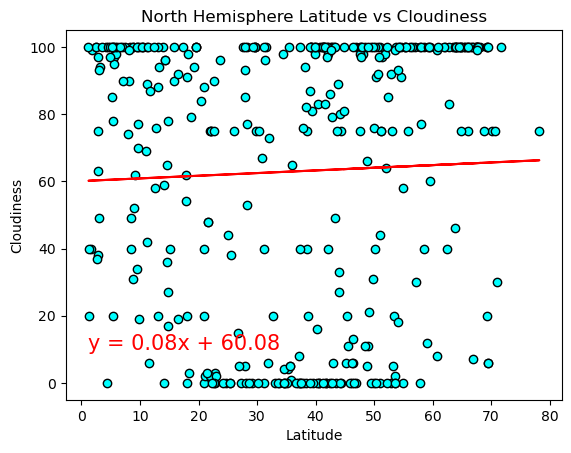

In [35]:
# Northern Hemisphere
Ncloud = northern_hemi_df['Cloudiness']
linear_regression_plot(Nlatitude, Ncloud, x_label='Latitude', y_label='Cloudiness', title='North Hemisphere Latitude vs Cloudiness')

The r-value is: 0.19437511367922305


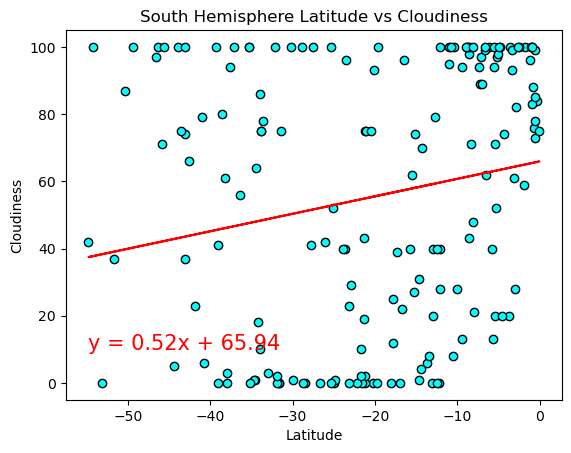

In [36]:
# Southern Hemisphere
Scloud = southern_hemi_df['Cloudiness']
linear_regression_plot(Slatitude, Scloud, x_label='Latitude', y_label='Cloudiness', title='South Hemisphere Latitude vs Cloudiness')

**Discussion about the linear relationship:**

In both hemispheres, there is a weak positive correlation between cloudiness and latitude, with a slightly stronger correlation observed in the Southern Hemisphere (r-value of 0.19) compared to the Northern Hemisphere (r-value of 0.03). This suggests that there may be a tendency for cloudiness to increase slightly in higher latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13705954323822564


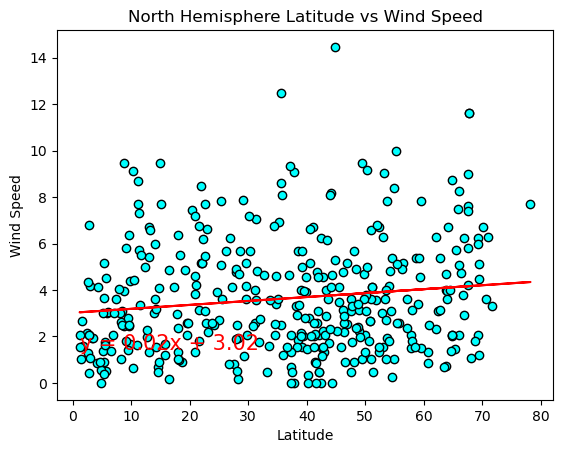

In [37]:
# Northern Hemisphere
Nwind = northern_hemi_df['Wind Speed']
linear_regression_plot(Nlatitude, Nwind, x_label='Latitude', y_label='Wind Speed', title='North Hemisphere Latitude vs Wind Speed')

The r-value is: -0.15689347434908094


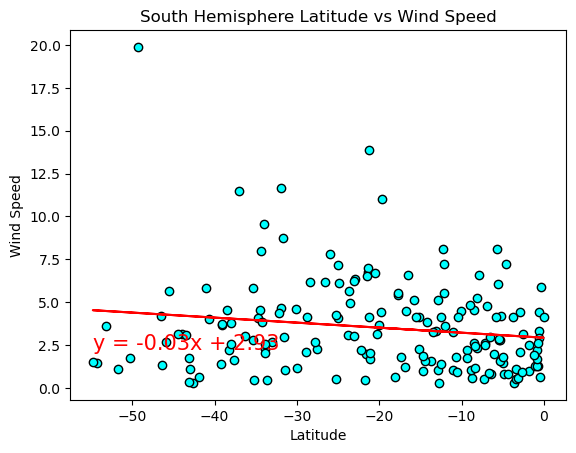

In [38]:
# Southern Hemisphere
Swind = southern_hemi_df['Wind Speed']
linear_regression_plot(Slatitude, Swind, x_label='Latitude', y_label='Wind Speed', title='South Hemisphere Latitude vs Wind Speed')

**Discussion about the linear relationship:** 

There is a very weak positive correlation between wind speed and latitude in the Northern Hemisphere (r-value of 0.13) and a weak negative correlation in the Southern Hemisphere (r-value of -0.15). These correlations suggest that latitude has little influence on wind speed. 